In [1]:
!pip install matplotlib

In [2]:
!pip install --upgrade tensorflow

     |████████████████████████████████| 320.4MB 43kB/s 
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [3]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
test_labels.shape

(10000,)

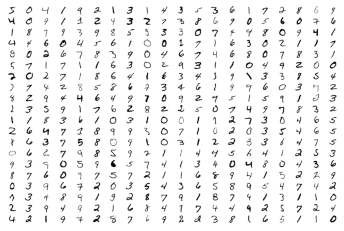

In [5]:
for i in range(400):
    ax = plt.subplot(20, 20, i+1)
    ax.axis('off')
    plt.imshow(training_images[i], cmap='Greys')

In [6]:
image_size=784

In [7]:
training_data=training_images.reshape(training_images.shape[0],image_size)
test_data=test_images.reshape(test_images.shape[0],image_size)

In [8]:
training_data.shape

(60000, 784)

In [9]:
test_data.shape

(10000, 784)

In [10]:
training_labels[0]

5

In [11]:
from tensorflow.keras.utils import to_categorical
num_classes=10
training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)
training_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
model = Sequential()
model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_data, training_labels, batch_size=128, epochs=5, verbose=True, validation_split=.1)

Epoch 1/5
422/422 [==============================] - 1s 2ms/step - loss: 1.4475 - accuracy: 0.6014 - val_loss: 0.9773 - val_accuracy: 0.8000
Epoch 2/5
422/422 [==============================] - 1s 2ms/step - loss: 0.8750 - accuracy: 0.8154 - val_loss: 0.6937 - val_accuracy: 0.8680
Epoch 3/5
422/422 [==============================] - 1s 2ms/step - loss: 0.6810 - accuracy: 0.8576 - val_loss: 0.5420 - val_accuracy: 0.8977
Epoch 4/5
422/422 [==============================] - 1s 2ms/step - loss: 0.5702 - accuracy: 0.8756 - val_loss: 0.4780 - val_accuracy: 0.9002
Epoch 5/5
422/422 [==============================] - 1s 2ms/step - loss: 0.5036 - accuracy: 0.8864 - val_loss: 0.4158 - val_accuracy: 0.9105


In [31]:
history.history

{'accuracy': [0.6013518571853638,
  0.8153703808784485,
  0.8576481342315674,
  0.8755925893783569,
  0.8864074349403381],
 'loss': [1.4475470781326294,
  0.875023365020752,
  0.6810199618339539,
  0.5702086091041565,
  0.5036435127258301],
 'val_accuracy': [0.800000011920929,
  0.8679999709129333,
  0.8976666927337646,
  0.9001666903495789,
  0.9104999899864197],
 'val_loss': [0.9773461818695068,
  0.6937358975410461,
  0.5419910550117493,
  0.4780389666557312,
  0.41579896211624146]}

In [22]:
loss, accuracy  = model.evaluate(test_data, test_labels, verbose=True)

313/313 [==============================] - 0s 1ms/step - loss: 0.4569 - accuracy: 0.9005


In [23]:
model.metrics_names

['loss', 'accuracy']

In [24]:
loss

0.4569168984889984

In [25]:
accuracy

0.9004999995231628

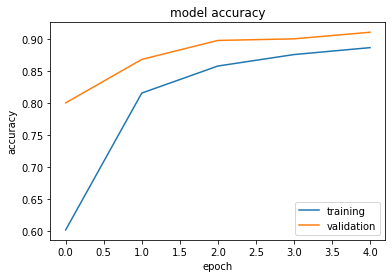

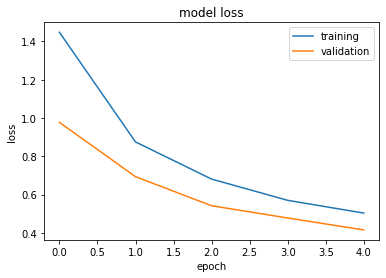

Test loss: 0.457
Test accuracy: 0.9


In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')